In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
import os
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import download
import nltk
# Download the VADER lexicon
nltk.download('vader_lexicon')

%matplotlib inline
sns.set()

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\malli\AppData\Roaming\nltk_data...


In [2]:
tweets_data = pd.read_csv('stocktweet.csv')

In [3]:
tweets_data.isnull().sum()

id        0
date      0
ticker    0
tweet     0
dtype: int64

In [4]:
# Function to clean tweets
def preprocess_tweet(tweet):
    """
    Cleans the tweet text by removing URLs, special characters, and emojis.
    """
    tweet = re.sub(r"http\S+|www\S+", "", tweet)  # Remove URLs
    tweet = re.sub(r"[^A-Za-z0-9\s$]", "", tweet)  # Remove special characters except stock tickers
    tweet = tweet.lower().strip()  # Convert to lowercase
    return tweet

# Apply cleaning to the tweet column
tweets_data['tweet_cleaned'] = tweets_data['tweet'].apply(preprocess_tweet)
# Download the VADER lexicon
nltk.download('vader_lexicon')
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
tweets_data['sentiment_score'] = tweets_data['tweet_cleaned'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

# Convert date column to datetime
tweets_data['date'] = pd.to_datetime(tweets_data['date'], format='%d/%m/%Y')

# Inspect cleaned data
print(tweets_data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\malli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


       id       date ticker  \
0  100001 2020-01-01   AMZN   
1  100002 2020-01-01   TSLA   
2  100003 2020-01-01   AAPL   
3  100004 2020-01-01   TSLA   
4  100005 2020-01-01   TSLA   

                                               tweet  \
0       $AMZN Dow futures up by 100 points already 🥳   
1  $TSLA Daddy's drinkin' eArly tonight! Here's t...   
2  $AAPL We’ll been riding since last December fr...   
3            $TSLA happy new year, 2020, everyone🍷🎉🙏   
4  $TSLA haha just a collection of greats..."Mars...   

                                       tweet_cleaned  sentiment_score  
0         $amzn dow futures up by 100 points already           0.0000  
1  $tsla daddys drinkin early tonight heres to a ...           0.0000  
2  $aapl well been riding since last december fro...           0.2732  
3                 $tsla happy new year 2020 everyone           0.5719  
4  $tsla haha just a collection of greatsmars rof...           0.7717  


In [7]:
dir = os.getcwd()
print(dir)

c:\Users\malli\Downloads\Advanced Data Analytics


In [8]:
# Set the folder path for the stock price data
folder_path = r'c:\Users\malli\Downloads\Advanced Data Analytics\stockprice'

# Verify the folder exists
if os.path.exists(folder_path):
    print("Folder exists. Files in the folder:")
    print(os.listdir(folder_path))
else:
    print("Folder not found. Check the folder path.")

# Dictionary to store DataFrames
dataframes = {}

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Process only CSV files
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV file into a DataFrame
        variable_name = file_name.replace('.csv', '').upper()  # Create variable name
        dataframes[variable_name] = pd.read_csv(file_path)

# Example: Access the DataFrame for a specific file
if 'AAPL' in dataframes:
    print("AAPL DataFrame:")
    print(dataframes['AAPL'].head())
else:
  print("AAPL DataFrame not found.")


Folder exists. Files in the folder:
['AAPL.csv', 'ABNB.csv', 'AMT.csv', 'AMZN.csv', 'BA.csv', 'BABA.csv', 'BAC.csv', 'BKNG.csv', 'BRK-A.csv', 'BRK-B.csv', 'CCL.csv', 'CVX.csv', 'DIS.csv', 'FB.csv', 'GOOG.csv', 'GOOGL.csv', 'HD.csv', 'JNJ.csv', 'JPM.csv', 'KO.csv', 'LOW.csv', 'MA.csv', 'MCD.csv', 'META.csv', 'MSFT.csv', 'NFLX.csv', 'NKE.csv', 'NVDA.csv', 'PFE.csv', 'PG.csv', 'PYPL.csv', 'SBUX.csv', 'TM.csv', 'TSLA.csv', 'TSM.csv', 'UNH.csv', 'UPS.csv', 'V.csv', 'WMT.csv', 'XOM.csv', '^GSPC.csv']
AAPL DataFrame:
         Date       Open       High        Low      Close  Adj Close  \
0  2019-12-31  72.482498  73.419998  72.379997  73.412498  71.520821   
1  2020-01-02  74.059998  75.150002  73.797501  75.087502  73.152649   
2  2020-01-03  74.287498  75.144997  74.125000  74.357498  72.441460   
3  2020-01-06  73.447502  74.989998  73.187500  74.949997  73.018677   
4  2020-01-07  74.959999  75.224998  74.370003  74.597504  72.675278   

      Volume  
0  100805600  
1  135480400  
2  146

In [9]:
# Loop through all DataFrames in the dictionary
for ticker, df in dataframes.items():
    print(f"Checking null values for {ticker}...")
    # Calculate the number of null values in each column
    null_counts = df.isnull().sum()
    # Print the null counts
    print(null_counts)
    print(f"Total null values in {ticker}: {null_counts.sum()}")
    print("-------------****----------------\n")


Checking null values for AAPL...
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Total null values in AAPL: 0
-------------****----------------

Checking null values for ABNB...
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Total null values in ABNB: 0
-------------****----------------

Checking null values for AMT...
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Total null values in AMT: 0
-------------****----------------

Checking null values for AMZN...
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Total null values in AMZN: 0
-------------****----------------

Checking null values for BA...
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype:

In [10]:
import pandas as pd

# Convert dates to datetime format
tweets_data['date'] = pd.to_datetime(tweets_data['date'], format='%d/%m/%Y')

def merge_stock_and_tweets(stock_df, ticker, tweets_df):
    # Ensure date column in stock DataFrame is in datetime format
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])

    # Filter tweets for the specific ticker
    ticker_tweets = tweets_df[tweets_df['ticker'] == ticker]

    # Merge stock prices and filtered tweets based on the date
    merged_df = pd.merge(stock_df, ticker_tweets, left_on='Date', right_on='date', how='left')

    # Drop the redundant 'date' column from tweets
    merged_df.drop(columns=['date'], inplace=True)

    return merged_df

# Dictionary to store merged DataFrames
merged_dataframes = {}

# Iterate over each stock ticker in the dataframes dictionary
for ticker, stock_df in dataframes.items():
    merged_dataframes[ticker] = merge_stock_and_tweets(stock_df, ticker, tweets_data)

# Example: Access and display the merged DataFrame for AAPL
merged_aapl = merged_dataframes['AAPL']
print(merged_aapl.head())


        Date       Open       High        Low      Close  Adj Close  \
0 2019-12-31  72.482498  73.419998  72.379997  73.412498  71.520821   
1 2020-01-02  74.059998  75.150002  73.797501  75.087502  73.152649   
2 2020-01-02  74.059998  75.150002  73.797501  75.087502  73.152649   
3 2020-01-02  74.059998  75.150002  73.797501  75.087502  73.152649   
4 2020-01-02  74.059998  75.150002  73.797501  75.087502  73.152649   

      Volume        id ticker  \
0  100805600       NaN    NaN   
1  135480400  100007.0   AAPL   
2  135480400  100008.0   AAPL   
3  135480400  100009.0   AAPL   
4  135480400  100011.0   AAPL   

                                               tweet  \
0                                                NaN   
1  $AAPL $300 calls First trade of 2020 Congrats ...   
2  $AAPL Remember, if you short every day, one of...   
3  $AAPL called it, the bear comment below makes ...   
4         Apple is taking things UP in 2020 🚀🚀 $AAPL   

                                     

In [11]:
# List of tickers to extract and save
tickers_to_save = [
    "AMZN", "TSLA", "AAPL", "HD", "NVDA", "GOOGL", "NFLX", "FB", "DIS", "BA",
    "WMT", "TSM", "BABA", "V", "SBUX", "BAC", "UNH", "XOM", "MSFT", "GOOG",
    "PFE", "CVX", "PYPL", "MCD", "JPM", "NKE", "BKNG", "CCL", "BRK.B", "MA",
    "JNJ", "AMT", "LOW", "KO", "UPS", "PG", "ABNB"
]

# Path to save the CSV files
output_folder = "./merged_csv_outputs1"  # Adjust to your desired folder
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

# Save the DataFrames to CSV
for ticker in tickers_to_save:
    if ticker in merged_dataframes:
        output_path = os.path.join(output_folder, f"{ticker}_merged.csv")
        merged_dataframes[ticker].to_csv(output_path, index=False)
        print(f"Saved {ticker} data to {output_path}")
    else:
        print(f"{ticker} data not found in merged_dataframes.")


Saved AMZN data to ./merged_csv_outputs1\AMZN_merged.csv
Saved TSLA data to ./merged_csv_outputs1\TSLA_merged.csv
Saved AAPL data to ./merged_csv_outputs1\AAPL_merged.csv
Saved HD data to ./merged_csv_outputs1\HD_merged.csv
Saved NVDA data to ./merged_csv_outputs1\NVDA_merged.csv
Saved GOOGL data to ./merged_csv_outputs1\GOOGL_merged.csv
Saved NFLX data to ./merged_csv_outputs1\NFLX_merged.csv
Saved FB data to ./merged_csv_outputs1\FB_merged.csv
Saved DIS data to ./merged_csv_outputs1\DIS_merged.csv
Saved BA data to ./merged_csv_outputs1\BA_merged.csv
Saved WMT data to ./merged_csv_outputs1\WMT_merged.csv
Saved TSM data to ./merged_csv_outputs1\TSM_merged.csv
Saved BABA data to ./merged_csv_outputs1\BABA_merged.csv
Saved V data to ./merged_csv_outputs1\V_merged.csv
Saved SBUX data to ./merged_csv_outputs1\SBUX_merged.csv
Saved BAC data to ./merged_csv_outputs1\BAC_merged.csv
Saved UNH data to ./merged_csv_outputs1\UNH_merged.csv
Saved XOM data to ./merged_csv_outputs1\XOM_merged.csv
Sa

In [25]:
aapl = pd.read_csv(r'C:\Users\malli\Downloads\Advanced Data Analytics\merged_csv_outputs1\AAPL_merged.csv')

In [26]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,id,ticker,tweet,tweet_cleaned,sentiment_score
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,100007.0,AAPL,$AAPL $300 calls First trade of 2020 Congrats ...,$aapl $300 calls first trade of 2020 congrats ...,0.5267
2,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,100008.0,AAPL,"$AAPL Remember, if you short every day, one of...",$aapl remember if you short every day one of t...,0.0000
3,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,100009.0,AAPL,"$AAPL called it, the bear comment below makes ...",$aapl called it the bear comment below makes m...,0.4019
4,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,100011.0,AAPL,Apple is taking things UP in 2020 🚀🚀 $AAPL,apple is taking things up in 2020 $aapl,0.0000


In [15]:
# Check for null values
print("Null values before dropping rows:")
print(aapl.isnull().sum())

# Drop rows with null values
aapl_cleaned = aapl.dropna()

# Check null values after cleaning
print("Null values after dropping rows:")
print(aapl_cleaned.isnull().sum())

# Save the cleaned dataset with "_final" extension
#output_path = '/content/drive/MyDrive/my_folder/AAPL_merged_final.csv'
aapl_cleaned.to_csv(output_path, index=False)

print(f"Cleaned file saved to: {output_path}")

Null values before dropping rows:
Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
id                 22
ticker             22
tweet              22
tweet_cleaned      22
sentiment_score    22
dtype: int64
Null values after dropping rows:
Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
id                 0
ticker             0
tweet              0
tweet_cleaned      0
sentiment_score    0
dtype: int64
Cleaned file saved to: ./merged_csv_outputs1\ABNB_merged.csv


In [ ]:
aapl = pd.read_csv('/content/drive/MyDrive/my_folder/ABNB_merged.csv')

# Check for null values
print("Null values before dropping rows:")
print(aapl.isnull().sum())

# Drop rows with null values
aapl_cleaned = aapl.dropna()

# Check null values after cleaning
print("Null values after dropping rows:")
print(aapl_cleaned.isnull().sum())

# Save the cleaned dataset with "_final" extension
output_path = '/content/drive/MyDrive/my_folder/ABNB_merged_final.csv'
aapl_cleaned.to_csv(output_path, index=False)

print(f"Cleaned file saved to: {output_path}")

In [ ]:
aapl = pd.read_csv('/content/drive/MyDrive/my_folder/AMZN_merged.csv')

# Check for null values
print("Null values before dropping rows:")
print(aapl.isnull().sum())

# Drop rows with null values
aapl_cleaned = aapl.dropna()

# Check null values after cleaning
print("Null values after dropping rows:")
print(aapl_cleaned.isnull().sum())

# Save the cleaned dataset with "_final" extension
output_path = '/content/drive/MyDrive/my_folder/AMZN_merged_final.csv'
aapl_cleaned.to_csv(output_path, index=False)

print(f"Cleaned file saved to: {output_path}")

In [ ]:
aapl = pd.read_csv('/content/drive/MyDrive/my_folder/BABA_merged.csv')

# Check for null values
print("Null values before dropping rows:")
print(aapl.isnull().sum())

# Drop rows with null values
aapl_cleaned = aapl.dropna()

# Check null values after cleaning
print("Null values after dropping rows:")
print(aapl_cleaned.isnull().sum())

# Save the cleaned dataset with "_final" extension
output_path = '/content/drive/MyDrive/my_folder/BABA_merged_final.csv'
aapl_cleaned.to_csv(output_path, index=False)

print(f"Cleaned file saved to: {output_path}")

In [ ]:
aapl = pd.read_csv('/content/drive/MyDrive/my_folder/BAC_merged.csv')

# Check for null values
print("Null values before dropping rows:")
print(aapl.isnull().sum())

# Drop rows with null values
aapl_cleaned = aapl.dropna()

# Check null values after cleaning
print("Null values after dropping rows:")
print(aapl_cleaned.isnull().sum())

# Save the cleaned dataset with "_final" extension
output_path = '/content/drive/MyDrive/my_folder/BAC_merged_final.csv'
aapl_cleaned.to_csv(output_path, index=False)

print(f"Cleaned file saved to: {output_path}")

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [21]:
# Load the data for the companies
file_paths = {
    "AAPL": "AAPL_merged_final.csv",
    "ABNB": "ABNB_merged_final.csv",
    "AMZN": "AMZN_merged_final.csv",
    "BABA": "BABA_merged_final.csv",
    "BAC": "BAC_merged_final.csv"
}

Processing AAPL...
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


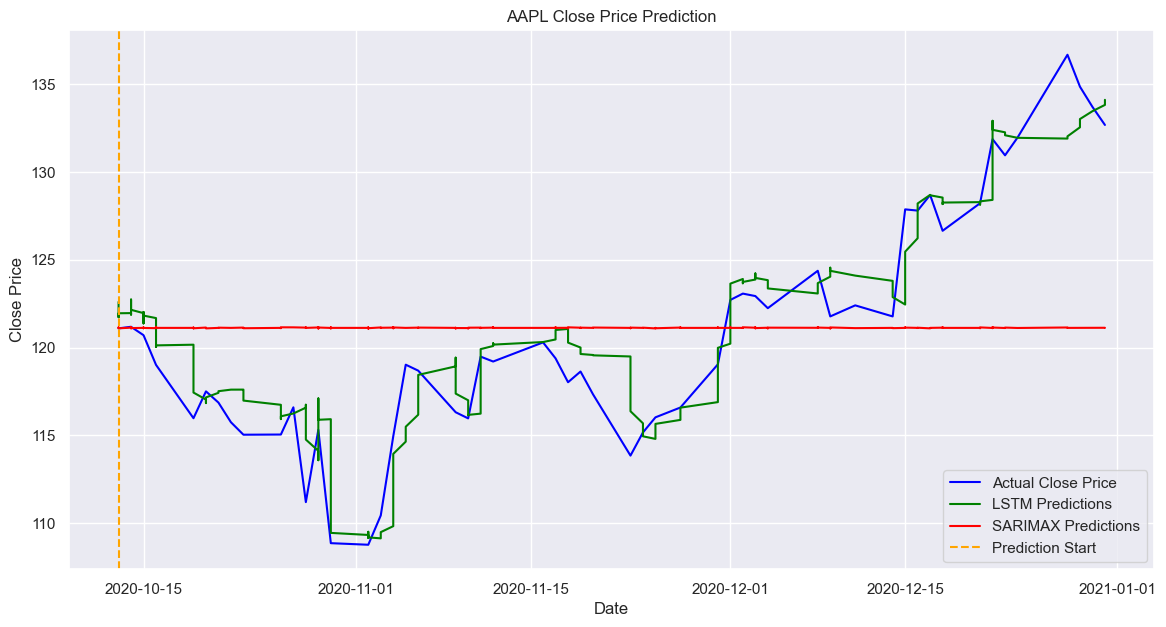

Processing ABNB...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


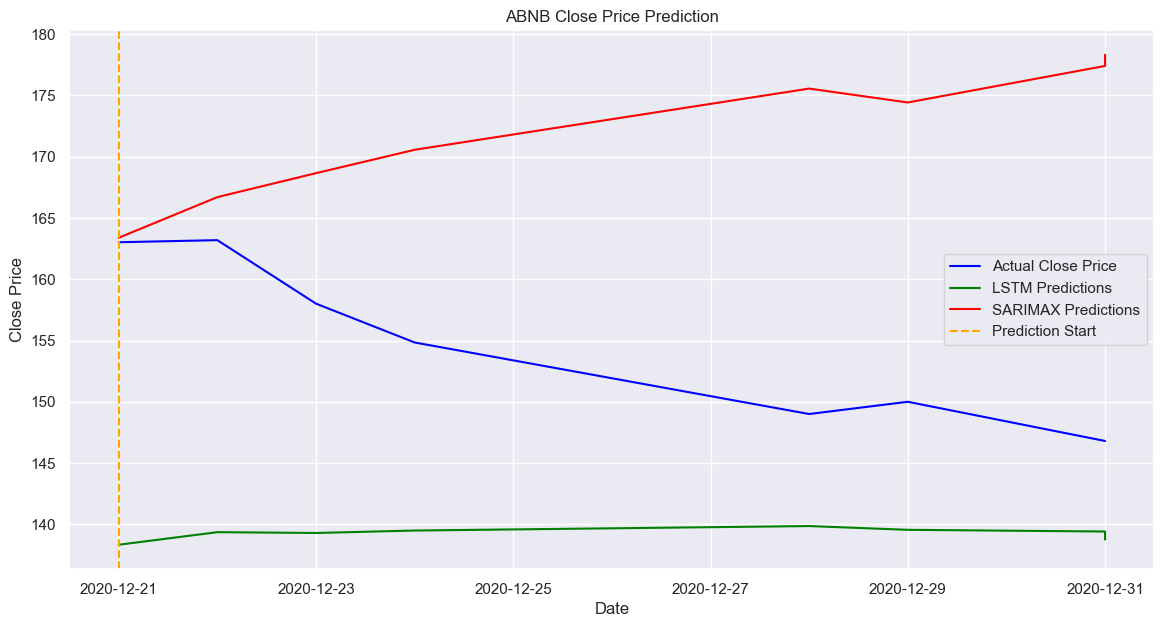

Processing AMZN...
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step


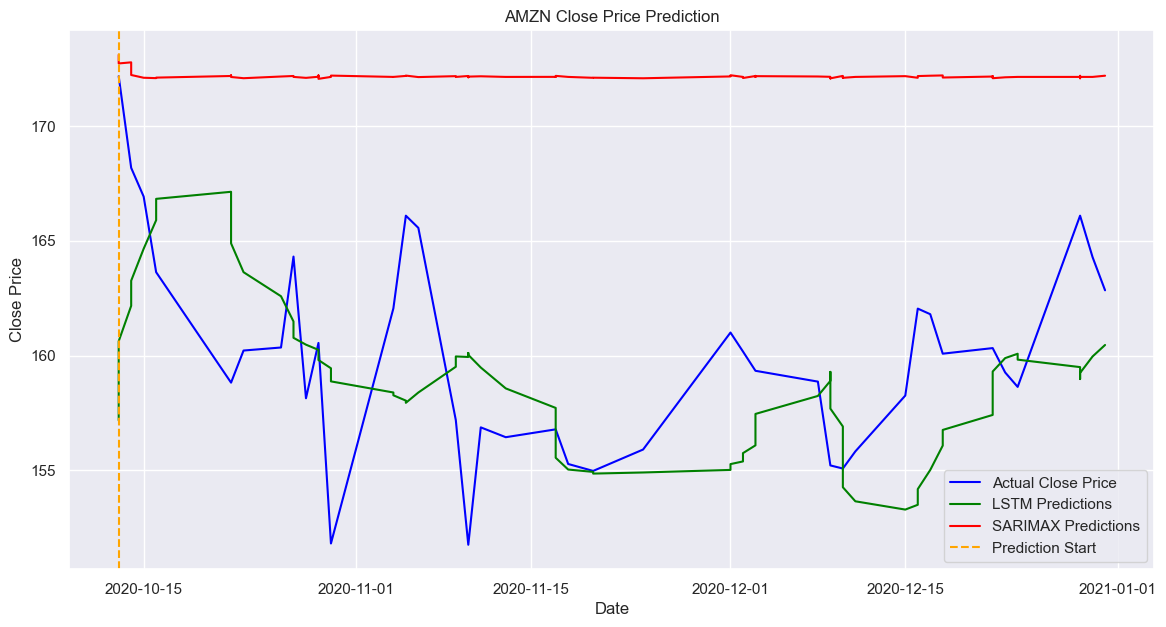

Processing BABA...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 907ms/step


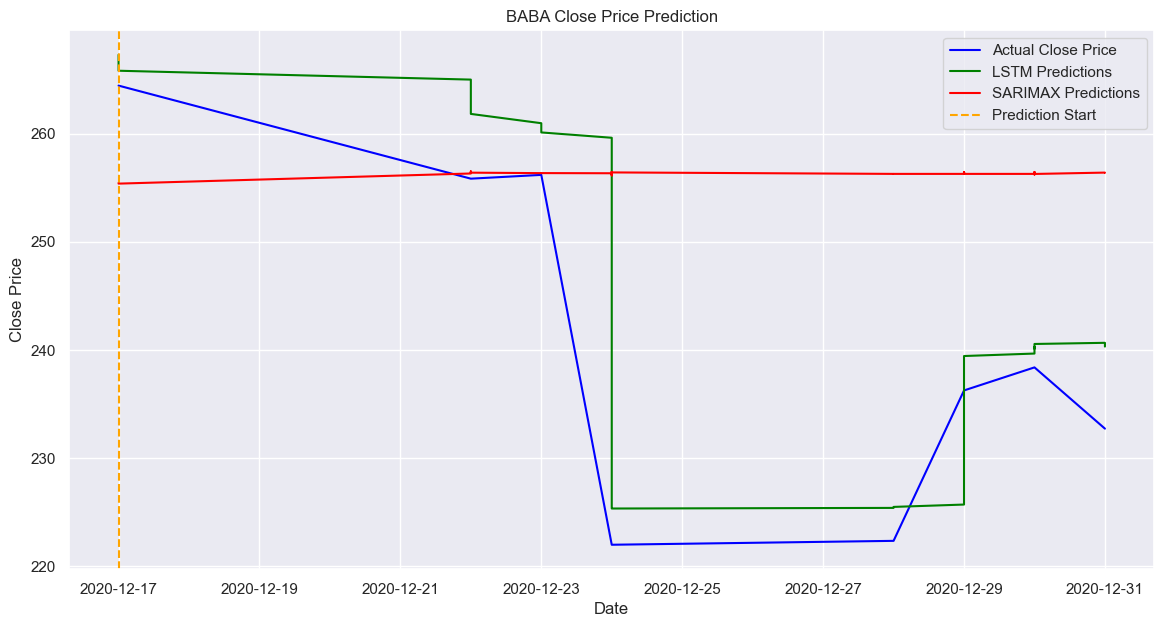

Processing BAC...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


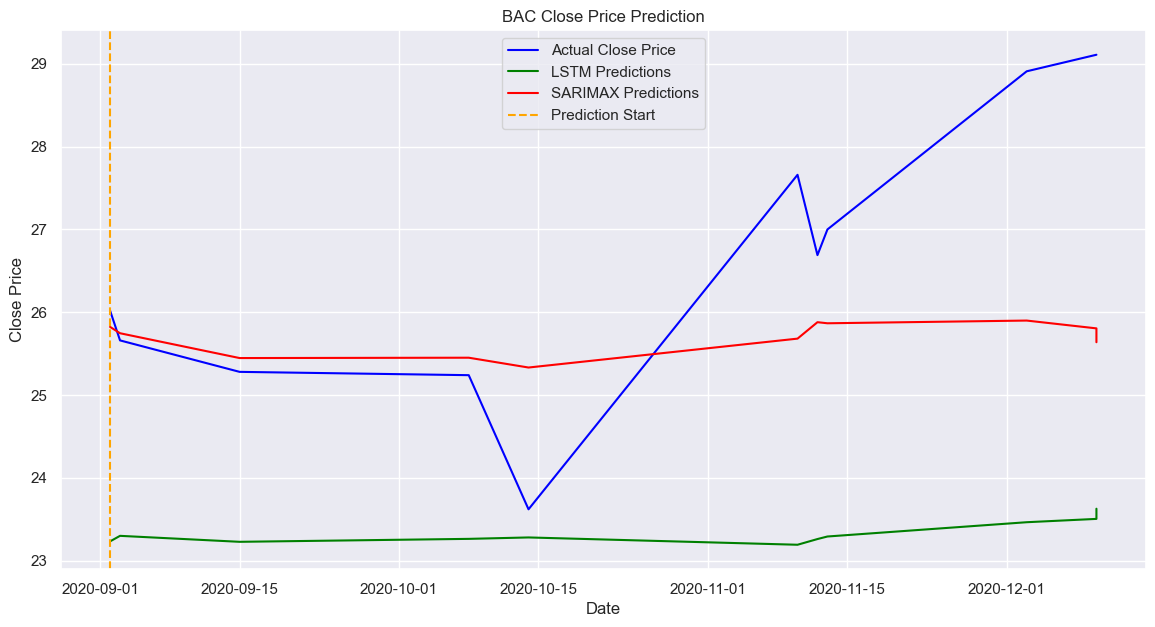

Forecast for AAPL:
Actual Close Prices: [121.09999847 121.09999847 121.09999847 121.09999847 121.09999847
 121.09999847 121.09999847]
LSTM Predictions (1 day, 3 days, 7 days): [122.61004 122.14471 121.83347]
SARIMAX Predictions (1 day, 3 days, 7 days): [121.12683951 121.11995742 121.12699803]


Forecast for ABNB:
Actual Close Prices: [163.02000427 163.19000244 158.00999451 154.83999634 149.
 150.         146.80000305]
LSTM Predictions (1 day, 3 days, 7 days): [138.33107 139.29211 139.41121]
SARIMAX Predictions (1 day, 3 days, 7 days): [163.38443732 168.65673712 177.40868138]


Forecast for AMZN:
Actual Close Prices: [172.1815033  172.1815033  172.1815033  168.1855011  168.1855011
 166.93249512 163.63549805]
LSTM Predictions (1 day, 3 days, 7 days): [157.17392 160.62527 165.90346]
SARIMAX Predictions (1 day, 3 days, 7 days): [173.11743525 172.73844314 172.09791438]


Forecast for BABA:
Actual Close Prices: [264.42999268 264.42999268 255.83000183 255.83000183 255.83000183
 255.83000183 2

In [ ]:
# Dictionary to store forecast results
forecast_results = {}

for ticker, file_path in file_paths.items():
    print(f"Processing {ticker}...")
    data = pd.read_csv(file_path)

    # Ensure 'Date' column is datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Sort data by date
    data = data.sort_values('Date')

    # Extract Close prices and sentiment scores
    close_prices = data['Close'].values.reshape(-1, 1)
    sentiment_scores = data['sentiment_score'].fillna(0).values.reshape(-1, 1)

    # Scale the data
    close_scaler = MinMaxScaler(feature_range=(0, 1))
    sentiment_scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_close_prices = close_scaler.fit_transform(close_prices)
    scaled_sentiment_scores = sentiment_scaler.fit_transform(sentiment_scores)

    # Combine close prices and sentiment scores
    combined_data = np.hstack((scaled_close_prices, scaled_sentiment_scores))

    # Prepare the data for LSTM
    def create_dataset(dataset, look_back=1):
        X, y = [], []
        for i in range(len(dataset) - look_back):
            X.append(dataset[i:(i + look_back)])
            y.append(dataset[i + look_back, 0])  # Predicting the close price
        return np.array(X), np.array(y)

    look_back = 10
    X, y = create_dataset(combined_data, look_back)

    # Reshape for LSTM input
    X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

    # Split into train and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build and train the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, X.shape[2])))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Make predictions using LSTM
    lstm_predictions_scaled = model.predict(X_test)
    lstm_predictions = close_scaler.inverse_transform(lstm_predictions_scaled)

    # Prepare data for SARIMAX
    close_prices_flat = close_prices.flatten()
    sentiment_scores_flat = sentiment_scores.flatten()
    train_arima = close_prices_flat[:train_size + look_back]
    test_arima = close_prices_flat[train_size + look_back:]
    exog_train = sentiment_scores_flat[:train_size + look_back]
    exog_test = sentiment_scores_flat[train_size + look_back:]

    # Fit SARIMAX model
    sarimax_model = SARIMAX(train_arima, exog=exog_train, order=(5, 1, 0))
    sarimax_fit = sarimax_model.fit()

    # Forecast using SARIMAX
    sarimax_predictions = sarimax_fit.forecast(steps=len(test_arima), exog=exog_test)

    # Store results
    forecast_results[ticker] = {
        "Actual": close_prices_flat[-len(test_arima):],
        "LSTM": lstm_predictions.flatten(),
        "SARIMAX": sarimax_predictions
    }

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'][-len(test_arima):], close_prices_flat[-len(test_arima):], label='Actual Close Price', color='blue')
    plt.plot(data['Date'][-len(test_arima):], lstm_predictions.flatten(), label='LSTM Predictions', color='green')
    plt.plot(data['Date'][-len(test_arima):], sarimax_predictions, label='SARIMAX Predictions', color='red')
    plt.axvline(data['Date'].iloc[-len(test_arima)], color='orange', linestyle='--', label='Prediction Start')
    plt.title(f"{ticker} Close Price Prediction")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Display forecasts for 1 day, 3 days, and 7 days ahead
for ticker, forecasts in forecast_results.items():
    print(f"Forecast for {ticker}:")
    print("Actual Close Prices:", forecasts["Actual"][:7])
    print("LSTM Predictions (1 day, 3 days, 7 days):", forecasts["LSTM"][[0, 2, 6]])
    print("SARIMAX Predictions (1 day, 3 days, 7 days):", forecasts["SARIMAX"][[0, 2, 6]])
    print("\n")


Testing parameters: {'batch_size': 16, 'epochs': 10, 'optimizer': 'adam', 'units': 32}
Testing parameters: {'batch_size': 16, 'epochs': 10, 'optimizer': 'adam', 'units': 50}
Testing parameters: {'batch_size': 16, 'epochs': 10, 'optimizer': 'adam', 'units': 64}
Testing parameters: {'batch_size': 16, 'epochs': 10, 'optimizer': 'rmsprop', 'units': 32}
Testing parameters: {'batch_size': 16, 'epochs': 10, 'optimizer': 'rmsprop', 'units': 50}
Testing parameters: {'batch_size': 16, 'epochs': 10, 'optimizer': 'rmsprop', 'units': 64}
Testing parameters: {'batch_size': 16, 'epochs': 20, 'optimizer': 'adam', 'units': 32}
Testing parameters: {'batch_size': 16, 'epochs': 20, 'optimizer': 'adam', 'units': 50}
Testing parameters: {'batch_size': 16, 'epochs': 20, 'optimizer': 'adam', 'units': 64}
Testing parameters: {'batch_size': 16, 'epochs': 20, 'optimizer': 'rmsprop', 'units': 32}
Testing parameters: {'batch_size': 16, 'epochs': 20, 'optimizer': 'rmsprop', 'units': 50}
Testing parameters: {'batch_

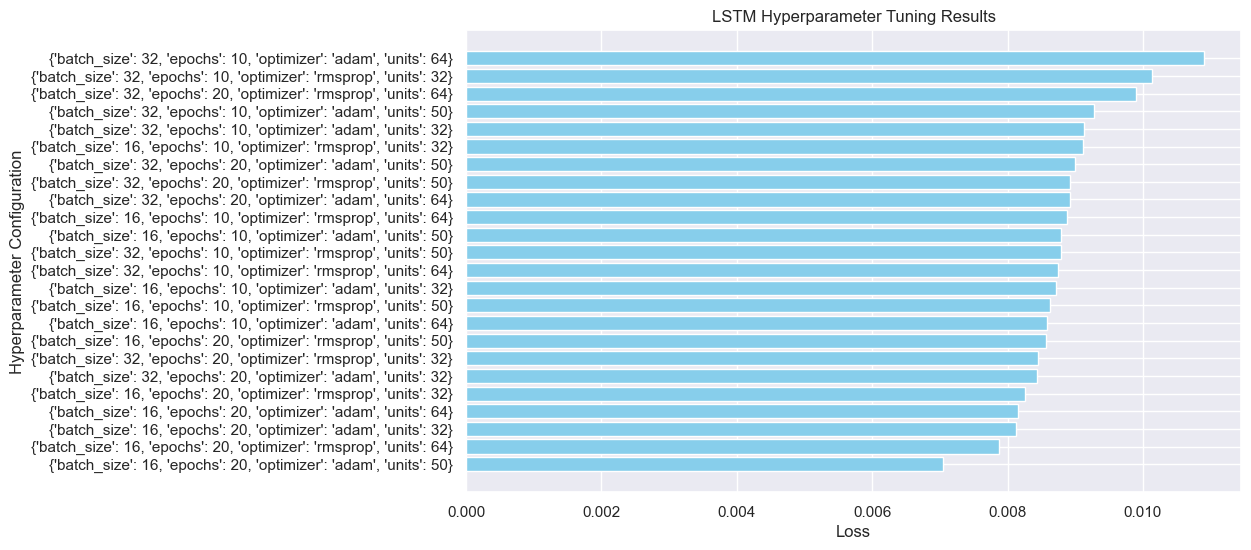

In [33]:
from sklearn.model_selection import ParameterGrid
from keras.optimizers import Adam, RMSprop
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define hyperparameter grid
param_grid = {
    "units": [32, 50, 64],
    "batch_size": [16, 32],
    "epochs": [10, 20],
    "optimizer": ['adam', 'rmsprop']
}

grid = ParameterGrid(param_grid)

# Store results
results = []

for params in grid:
    print(f"Testing parameters: {params}")
    
    # Build model
    model = Sequential()
    model.add(LSTM(params['units'], return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(params['units']))
    model.add(Dense(1))
    optimizer = Adam() if params['optimizer'] == 'adam' else RMSprop()
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    # Train model
    history = model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
    
    # Evaluate model
    loss = history.history['loss'][-1]
    results.append((params, loss))

# Sort results by loss
sorted_results = sorted(results, key=lambda x: x[1])

# Extract parameters and losses for plotting
params_list = [str(r[0]) for r in sorted_results]
losses = [r[1] for r in sorted_results]

# Plot results
plt.figure(figsize=(10, 6))
plt.barh(params_list, losses, color='skyblue')
plt.xlabel('Loss')
plt.ylabel('Hyperparameter Configuration')
plt.title('LSTM Hyperparameter Tuning Results')
plt.show()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0522
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0155
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0115
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0150
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0106
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0093
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0112 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0118
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0084
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0097
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0077 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0093 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0092
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0088 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0093 
Epoch 16/20
3/3 ━━━━━━━━━━━━━

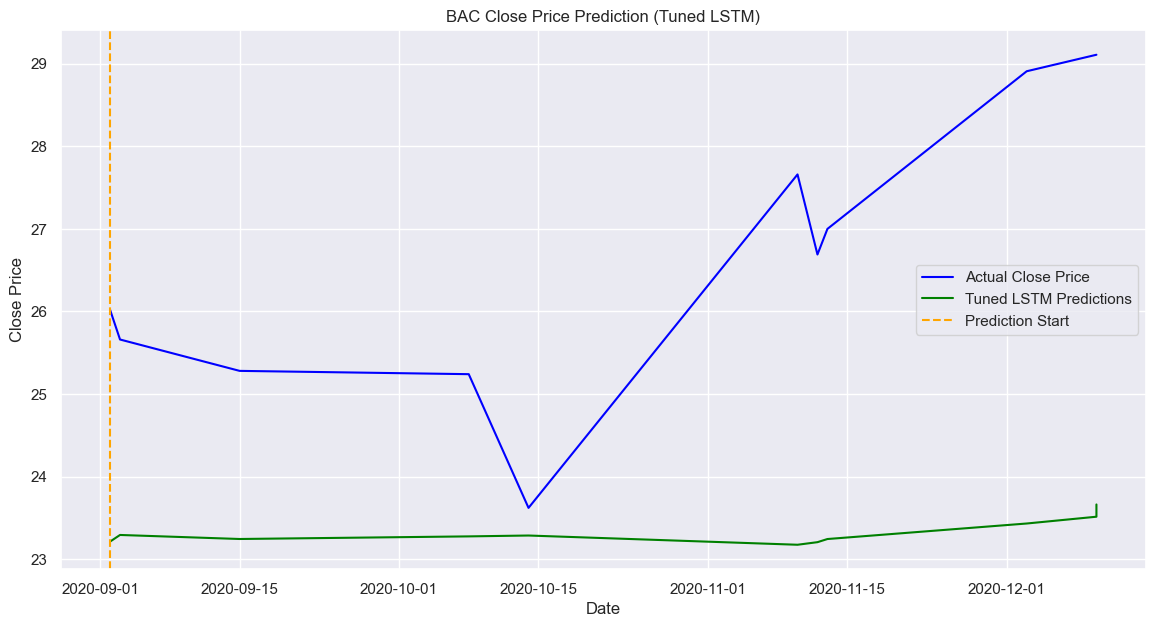

In [32]:
# Best hyperparameters (based on the tuning results)
best_params = {
    'units': 50,
    'batch_size': 16,
    'epochs': 20,
    'optimizer': 'adam'
}

# Re-train the LSTM model with the best parameters
model = Sequential()
model.add(LSTM(best_params['units'], return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model.add(LSTM(best_params['units']))
model.add(Dense(1))
optimizer = Adam() if best_params['optimizer'] == 'adam' else RMSprop()
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

# Make predictions using the tuned model
lstm_predictions_scaled = model.predict(X_test)
lstm_predictions = close_scaler.inverse_transform(lstm_predictions_scaled)

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][-len(y_test):], close_prices[-len(y_test):], label='Actual Close Price', color='blue')
plt.plot(data['Date'][-len(y_test):], lstm_predictions, label='Tuned LSTM Predictions', color='green')
plt.axvline(data['Date'].iloc[-len(y_test)], color='orange', linestyle='--', label='Prediction Start')
plt.title(f"{ticker} Close Price Prediction (Tuned LSTM)")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Best SARIMAX order: (2, 2, 2), AIC: 177.07560067428213


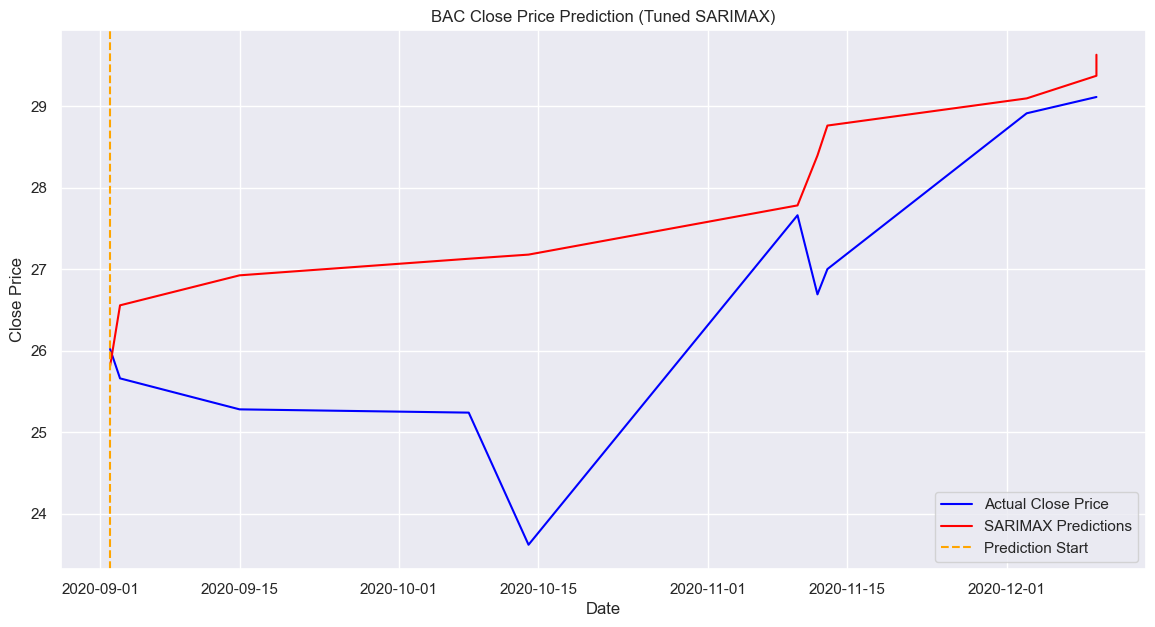

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# Define ranges for (p, d, q)
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Initialize variables to store best parameters
best_aic = float('inf')
best_order = None

# Grid search for best (p, d, q)
for param in pdq:
    try:
        model = SARIMAX(train_arima, exog=exog_train, order=param, seasonal_order=(0, 0, 0, 0))
        results = model.fit(disp=0)
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
    except Exception as e:
        continue

print(f"Best SARIMAX order: {best_order}, AIC: {best_aic}")

# Train the final SARIMAX model
sarimax_model = SARIMAX(train_arima, exog=exog_train, order=best_order)
sarimax_fit = sarimax_model.fit()

# Forecast with the final SARIMAX model
sarimax_predictions = sarimax_fit.forecast(steps=len(test_arima), exog=exog_test)

# Plot SARIMAX predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][-len(test_arima):], close_prices_flat[-len(test_arima):], label='Actual Close Price', color='blue')
plt.plot(data['Date'][-len(test_arima):], sarimax_predictions, label='SARIMAX Predictions', color='red')
plt.axvline(data['Date'].iloc[-len(test_arima)], color='orange', linestyle='--', label='Prediction Start')
plt.title(f"{ticker} Close Price Prediction (Tuned SARIMAX)")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


2025-01-03 18:51:57.945 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 18:51:58.697 
  command:

    streamlit run C:\Users\malli\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-03 18:51:58.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 18:51:58.701 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

2025-01-03 18:51:58.701 No runtime found, using MemoryCacheStorageManager
2025-01-03 18:51:58.707 No runtime f

False

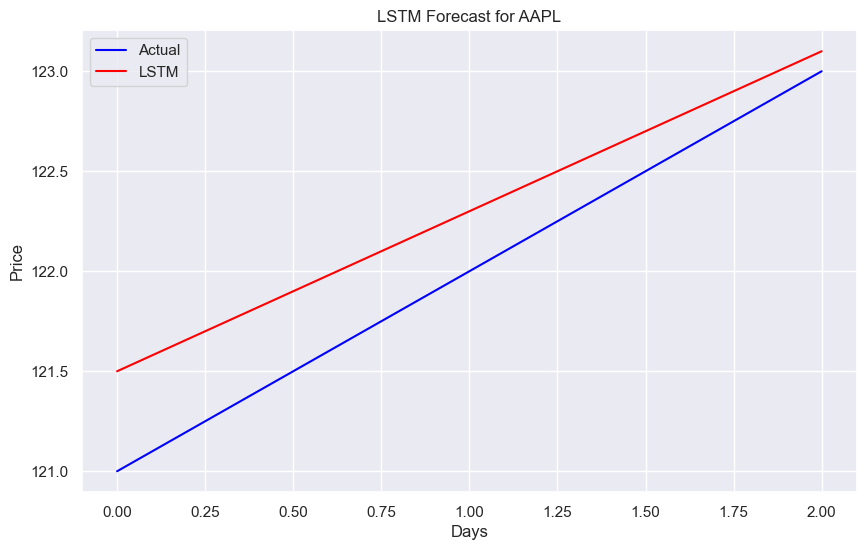

In [35]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load data
@st.cache
def load_data():
    # Replace with your file paths for predictions
    forecast_results = {
        "AAPL": {
            "Actual": [121, 122, 123],
            "LSTM": [121.5, 122.3, 123.1],
            "SARIMAX": [120.8, 122.1, 123.0],
        },
        "ABNB": {
            "Actual": [150, 151, 152],
            "LSTM": [150.2, 151.5, 152.3],
            "SARIMAX": [149.8, 150.9, 151.7],
        }
    }
    return forecast_results

# Load forecast data
forecast_results = load_data()

# Sidebar Controls
st.sidebar.title("Forecast Dashboard")
selected_stock = st.sidebar.selectbox("Select Stock", list(forecast_results.keys()))
selected_method = st.sidebar.radio("Select Method", ["LSTM", "SARIMAX"])
forecast_horizon = st.sidebar.slider("Select Forecast Horizon", min_value=1, max_value=7, value=3)

# Main Content
st.title(f"Forecast Dashboard for {selected_stock}")

# Fetch data for selected stock and method
actual = forecast_results[selected_stock]["Actual"]
predicted = forecast_results[selected_stock][selected_method]

# Filter data based on forecast horizon
actual_filtered = actual[:forecast_horizon]
predicted_filtered = predicted[:forecast_horizon]

# Line Chart
st.subheader("Actual vs Predicted Prices")
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(actual_filtered)), actual_filtered, label="Actual", color="blue")
ax.plot(range(len(predicted_filtered)), predicted_filtered, label=selected_method, color="red")
ax.set_xlabel("Days")
ax.set_ylabel("Price")
ax.set_title(f"{selected_method} Forecast for {selected_stock}")
ax.legend()
st.pyplot(fig)

# Error Metrics
st.subheader("Error Metrics")
mae = round(sum(abs(a - p) for a, p in zip(actual_filtered, predicted_filtered)) / forecast_horizon, 2)
rmse = round((sum((a - p) ** 2 for a, p in zip(actual_filtered, predicted_filtered)) / forecast_horizon) ** 0.5, 2)
st.write(f"**Mean Absolute Error (MAE):** {mae}")
st.write(f"**Root Mean Square Error (RMSE):** {rmse}")

# Download Option
st.subheader("Download Predictions")
download_data = pd.DataFrame({
    "Day": range(1, forecast_horizon + 1),
    "Actual": actual_filtered,
    f"{selected_method} Prediction": predicted_filtered
})
st.download_button(
    label="Download Predictions as CSV",
    data=download_data.to_csv(index=False).encode("utf-8"),
    file_name=f"{selected_stock}_{selected_method}_forecast.csv",
    mime="text/csv"
)
